Imports

In [1]:
import pandas as pd

0. Inici:
    - Carrega les dades de 'data/sales_data.csv' a un df
    - Mostra l'inici del dataset
    - Mostra la més informació bàsica.

In [4]:
df = pd.read_csv('data/sales_data.csv')
#df[Date] = df['Date'].to

df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Hydration Packs,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Stands,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,NaN,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         91636 non-null   object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

1. Preprocessat.

En el cicle de vida de les dades, l’etapa de neteja (o preprocessat) es compon del conjunt de processos que permeten identificar aquells registres incomplets, incorrectes, inexactes o no pertinents d’un conjunt de dades, per tal d’eliminar-les o corregir-les.

a) Hi ha dades perdudes? Indica quines.

b) Comprova si els valors numèrics es troben dins un rang lògic. Indica els casos en què no i explica per què.

c) Si hi ha dades perdudes numèriques, substitueix-les pel valor mitjà de la columna. Indica els canvis que facis.  

d) Si n'hi ha de categòriques, comprova si es poden inferir; en cas contrari, deixa-les en blanc.  

e) Converteix `Date` al format `Datetime`.  

f) Crea una columna nova `Order_Value = Unit_Price * Order_Quantity`.

g) Comprova que les dades del dataset són coherents. Per exemple, que `Profit + Cost = Revenue`. Si hi ha dades no coherents, identifica-les i corregeix-les si es pot. Nota que `Revenue` no equival a `Order_Value`, aquesta discrepància afecta a una pregunta de l'anàlisi.

h) Fes el dataset resultant el més petit possible i guarda'l. Elimina les columnes redundants i explica per què.


In [6]:
# a) Hi ha dades perdudes? Indica quines. 
# si Age_group tiene 21400 
df['Age_group'].isnull().sum()


KeyError: 'Age_group'

In [8]:
# b) Comprova si els valors numèrics es troben dins un rang lògic. Indica els casos en què no i explica per què.
df['Date'].describe()
df['Day'].describe()
# Age_Group tiene 21000 datos perdidos
# Day tiene valores como 32 
# Customer_Age tiene valores como 0
# Unit_cost tiene valores negativos


countries = df['Country'].unique()
country_states = {}


for country in countries:
    country_states[country] = df[df['Country'] == country]['State'].unique()

country_states
# comprobar que para cada producto se tiene la misma categoria y sub categoria


{'Canada': array(['British Columbia', 'Alberta', 'Ontario'], dtype=object),
 'Australia': array(['New South Wales', 'Victoria', 'Queensland', 'South Australia',
        'Tasmania'], dtype=object),
 'United States': array(['Oregon', 'California', 'Washington', 'Kentucky', 'Texas',
        'New York', 'Florida', 'Illinois', 'South Carolina',
        'North Carolina', 'Georgia', 'Virginia', 'Ohio', 'Wyoming',
        'Missouri', 'Montana', 'Utah', 'Minnesota', 'Mississippi',
        'Massachusetts', 'Arizona', 'Alabama'], dtype=object),
 'Germany': array(['Saarland', 'Hessen', 'Nordrhein-Westfalen', 'Hamburg', 'Bayern',
        'Brandenburg'], dtype=object),
 'France': array(['Seine Saint Denis', 'Moselle', 'Nord', 'Loir et Cher',
        'Seine (Paris)', 'Loiret', 'Hauts de Seine', 'Yveline', 'Essonne',
        "Val d'Oise", 'Seine et Marne', 'Val de Marne', 'Pas de Calais',
        'Charente-Maritime', 'Garonne (Haute)', 'Somme'], dtype=object),
 'United Kingdom': array(['England'], dty

In [9]:
# c) Si hi ha dades perdudes numèriques, substitueix-les pel valor mitjà de la columna. Indica els canvis que facis.  
products_to_correct = df["Product"][df["Unit_Cost"]<=0].unique()

for product in products_to_correct:
    mean_unit_cost = df[df['Product']==product]['Unit_Cost'].mean()

    for index, _ in df[df["Unit_Cost"]<=0].iterrows():
        df.loc[index, "Unit_Cost"] = int(mean_unit_cost)
    

In [10]:
days_to_correct = df[df["Day"]>31]
day_media = df["Day"].mean()
dias_32 = df["Day"].gt(31)

df.loc[dias_32, "Day"]= int(day_media) 


In [11]:
# d) Si n'hi ha de categòriques, comprova si es poden inferir; en cas contrari, deixa-les en blanc.  
age_unique = df[df["Age_Group"].isnull()]

df.loc[(df["Customer_Age"] < 25) & (df["Age_Group"].isna()), "Age_Group"] = "Youth (<25)"
df.loc[(df["Customer_Age"] >= 25) & (df["Customer_Age"] < 35) & (df["Age_Group"].isna()), "Age_Group"] = "Young Adults (25-34)"
df.loc[(df["Customer_Age"] >= 35) & (df["Customer_Age"] < 65) & (df["Age_Group"].isna()), "Age_Group"] = "Adults (35-64)"
df.loc[(df["Customer_Age"] > 64) & (df["Age_Group"].isna()), "Age_Group"] = "Seniors (64+)"


In [12]:
df["Age_Group"].unique()

array(['Youth (<25)', 'Adults (35-64)', 'Young Adults (25-34)',
       'Seniors (64+)'], dtype=object)

In [13]:
age_unique =df[ df["Age_Group"].isnull()]


In [14]:
# f) Crea una columna nova `Order_Value = Unit_Price * Order_Quantity`.
df["Order_Value"] = df["Unit_Price"] * df["Order_Quantity"]

In [19]:
# g) Comprova que les dades del dataset són coherents. Per exemple, que Profit + Cost = Revenue. 
# Si hi ha dades no coherents, identifica-les i corregeix-les si es pot. Nota que Revenue no equival a Order_Value, 
# aquesta discrepància afecta a una pregunta de l'anàlisi.
new_df = pd.DataFrame()
new_df["sum"] = df["Profit"] + df["Cost"]
comparison = df["Revenue"] == new_df["sum"]

(df["Revenue"] != new_df["sum"]).sum()

np.int64(0)

In [20]:
df.loc[df["Revenue"] != new_df["sum"], "Revenue"] = new_df["sum"]

In [27]:
# Nota que `Revenue` no equival a `Order_Value`, aquesta discrepància afecta a una pregunta de l'anàlisi.
new_df = pd.DataFrame()
new_df["upDonw"] = df["Order_Value"] > df["Revenue"]
(new_df["upDonw"] == False).sum()
# el Revenue es mas grande en 6569 filas 
# el order value es mas grande en 106467 filas

np.int64(106467)

In [30]:
# h) Fes el dataset resultant el més petit possible i guarda'l. Elimina les columnes redundants i explica per què.
clean_df = df.drop(columns=["Day", "Month", "Year", "Age_Group"])
clean_df.to_csv("./data/cleanSales.csv")
# son datos repetidos y separados sin mucho sentido

2. Anàlisi.
   
Dona els següents resultats o respon les següents preguntes justificant la teva resposta.

a) En quin mes de l'any es fan més ventes? Canvia aquest mes respecte l'any? Raona si aquest negoci és estacional.  

b) Calcula `Profit_%` i `Discount_%` de cada venta.  

c) Fes una gràfica que mostri el `Profit_%` mig per edat. Fes una segona gràfica que mostri el `Revenue` mig per edat.  

d) Diries que la distribució d'edat dels clients `Adults (35-64)` és normal?  

e) Creus que les etiquetes de `Age_Group` són útils per aquest anàlisi? Raona la teva resposta.

<Axes: xlabel='Date'>

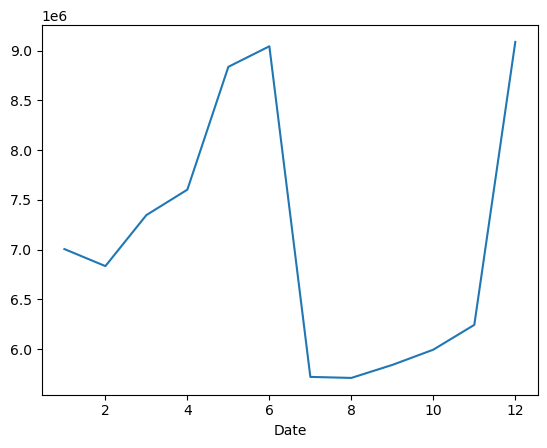

In [39]:
# a) En quin mes de l'any es fan més reveniu? Canvia aquest mes respecte l'any? Raona si aquest negoci és estacional.  
# En quin mes de l'any es fan més revenue
df["Date"] = pd.to_datetime(df["Date"])

#df.groupby([df["Date"].dt.year])["Revenue"].sum().plot(kind="line", label = "Ingresos por año")
df.groupby([df["Date"].dt.month])["Revenue"].sum().plot(kind="line", label = "Ingresos por mes")

In [45]:
# b) Calcula `Profit_%` i `Discount_%` de cada venta.  
df["Profit_%"] = (df["Profit"] / df["Revenue"]) * 100
df["Discount_%"] = -(df["Revenue"] - df["Order_Value"])/df["Revenue"] * 100

df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Order_Value,Profit_%,Discount_%
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,960,62.105263,1.052632
1,2015-11-26,26,November,2015,0,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,960,62.105263,1.052632
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2760,56.892961,14.952103
3,2016-03-23,23,March,2016,0,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2400,56.896552,14.942529
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,480,56.937799,14.832536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,...,"Classic Vest, S",3,24,64,112,72,184,192,60.869565,4.347826
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,...,"Classic Vest, M",22,24,64,655,528,1183,1408,55.367709,19.019442
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,...,"Classic Vest, M",22,24,64,655,528,1183,1408,55.367709,19.019442
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,...,"Classic Vest, L",24,24,64,684,576,1260,1536,54.285714,21.904762


In [43]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Order_Value,Profit_%
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Hydration Packs,Hitch Rack - 4-Bike,8,45,120,590,360,950,960,62.105263
1,2015-11-26,26,November,2015,0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Stands,Hitch Rack - 4-Bike,8,45,120,590,360,950,960,62.105263
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2760,56.892961
3,2016-03-23,23,March,2016,0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2400,56.896552
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,480,56.937799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,192,60.869565
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,1408,55.367709
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,1408,55.367709
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,1536,54.285714
